<a href="https://colab.research.google.com/github/20149312/Ha-Thanh-Hung-20149312/blob/main/NHAN_DIEN_KHUON_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ha Thanh Hung 20149312

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/COLAB NOTEBOOK/NHAN DIEN KHUON MAT

/content/drive/MyDrive/COLAB NOTEBOOK/NHAN DIEN KHUON MAT


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/COLAB NOTEBOOK/NHAN DIEN KHUON MAT/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 196 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'HUNG': 0, 'TIEN': 1, 'TUAN': 2}

In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/COLAB NOTEBOOK/NHAN DIEN KHUON MAT/VALIDATION',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 65 images belonging to 3 classes.


In [ ]:
validation.class_indices

{'HUNG': 0, 'TIEN': 1, 'TUAN': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model= Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 50 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
7/7 [==============================] - 202s 32s/step - loss: 5.5590 - accuracy: 0.4082 - val_loss: 0.9859 - val_accuracy: 0.3385
Epoch 2/50
7/7 [==============================] - 54s 8s/step - loss: 0.6424 - accuracy: 0.7347 - val_loss: 0.0963 - val_accuracy: 0.9692
Epoch 3/50
7/7 [==============================] - 54s 8s/step - loss: 0.1601 - accuracy: 0.9286 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 54s 9s/step - loss: 0.0351 - accuracy: 0.9847 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 54s 8s/step - loss: 0.0554 - accuracy: 0.9796 - val_loss: 0.0262 - val_accuracy: 0.9846
Epoch 6/50
7/7 [==============================] - 54s 8s/step - loss: 0.0109 - accuracy: 0.9949 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 56s 8s/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 9.9612e-04 - val_accuracy: 1.0000
Epoch 8/50
7/7 [============

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.15281404554843903
Train Accuracy 0.9897959232330322


<function matplotlib.pyplot.show(*args, **kw)>

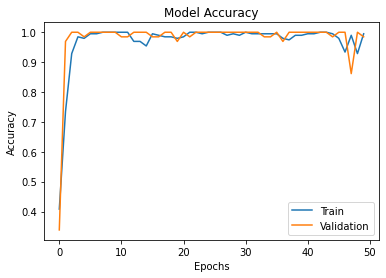

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("NHANDIENKHUONMAT.h5")

In [ ]:
model_ANN=load_model('NHANDIENKHUONMAT.h5')

1/1 [==============================] - 0s 119ms/step
HUNG


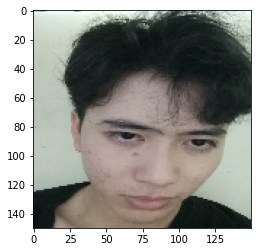

In [ ]:
img=load_img('/IMG_20221114_232051.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='HUNG'
if round(result[0][1])==1:
  prediction='TIEN'
if round(result[0][2])==1:
  prediction='TUAN'
print(prediction)